In [1]:
import pandas as pd
import numpy as np
import glob
import math
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.concat([pd.read_csv(f , usecols=['SYS_RECID','ZIPCODE','YEAR','QTR','FAC_REGION','ETHNICITY','RACE','SEX','AGE','WEEKDAY','PTSTATE','PTCOUNTRY','ADMSRC','HR_ARRIVAL','EDHR_DISCH','PT_STATUS','PAYER','REASON_CDE','ATTEN_PHYN'],
                            dtype= "category") for f in glob.glob('/Users/EricJC/Documents/Data/*.csv')], ignore_index = True, sort=False)
df.head()



,SYS_RECID,YEAR,QTR,FAC_REGION,ETHNICITY,RACE,SEX,AGE,WEEKDAY,ZIPCODE,PTSTATE,PTCOUNTRY,ADMSRC,HR_ARRIVAL,EDHR_DISCH,PT_STATUS,PAYER,REASON_CDE,ATTEN_PHYN
0,100140850,2018,1,11,E2,3,F,39,2,33168,FL,US,01,14,16,01,H,S50.371A,1639495245
1,100140851,2018,1,11,E2,5,M,89,2,33154,FL,US,01,11,14,01,B,T83.022A,1639495245
2,100140852,2018,1,11,E2,3,M,17,2,33147,FL,US,01,13,13,01,D,R09.81,1639495245
3,100140853,2018,1,11,E2,3,F,40,2,33147,FL,US,01,10,13,01,D,M25.511,1639495245
4,100140854,2018,1,11,E2,3,F,42,2,33142,FL,US,01,13,14,01,D,T30.0,1639495245


In [2]:
#These are the opioid codes that we are most interested in. We will filter the [REASON_CDE] column by these specific codes
def is_opioid_dx(opioid_dx):
    if opioid_dx in ['F11.10','F11.120','F11.121',
'F11.122','F11.129','F11.14','F11.150','F11.151','F11.159','F11.181','F11.182','F11.188',
'F11.19','F11.20','F11.220','F11.221','F11.222','F11.229','F11.23','F11.24','F11.250',
'F11.251','F11.259','F11.281','F11.282','F11.288','F11.29','F11.90','F11.920','F11.921',
'F11.922','F11.929','F11.93','F11.94','F11.950','F11.951','F11.959','F11.981','F11.982',
'F11.988','F11.99','T40.0X1A','T40.0X1D','T40.0X1S','T40.0X4A','T40.0X4D','T40.0X4S',
'T40.0X5A','T40.0X5D','T40.0X5S','T40.1X1A','T40.1X1D','T40.1X1S','T40.1X4A','T40.1X4D',
'T40.1X4S','T40.2X1A','T40.2X1D','T40.2X1S','T40.2X4A','T40.2X4D','T40.2X4S','T40.2X5A',
'T40.2X5D','T40.2X5S','T40.3X1A','T40.3X1D','T40.3X1S','T40.3X4A','T40.3X4D','T40.3X4S',
'T40.3X5A','T40.3X5D','T40.3X5S','T40.4X1A','T40.4X1D','T40.4X1S','T40.4X4A','T40.4X4D',
'T40.4X4S','T40.4X5A','T40.4X5D','T40.4X5S','T40.601A','T40.601D','T40.601S','T40.604A',
'T40.604D','T40.604S','T40.605A','T40.605D','T40.605S','T40.691A','T40.691D','T40.691S',
'T40.694A','T40.694D','T40.694S','T40.695A','T40.695D','T40.695S','T40.0X2A','T40.0X2D',
'T40.0X2S','T40.0X3A','T40.0X3D','T40.0X3S','T40.1X2A','T40.1X2D','T40.1X2S','T40.1X3A',
'T40.1X3D','T40.1X3S','T40.2X2A','T40.2X2D','T40.2X2S','T40.2X3A','T40.2X3D','T40.2X3S',
'T40.3X2A','T40.3X2D','T40.3X2S','T40.3X3A','T40.3X3D','T40.3X3S','T40.4X2A','T40.4X2D',
'T40.4X2S','T40.4X3A','T40.4X3D','T40.4X3S','T40.602A','T40.602D','T40.602S','T40.603A',
'T40.603D','T40.603S','T40.692A','T40.692D','T40.692S','T40.693A','T40.693D','T40.693S']:
        return 1
    else:
        return 0
df['REASON_CDE_01'] = df['REASON_CDE'].apply(is_opioid_dx).astype('category')

def is_night(arrtime):
    arrtime_int = int(arrtime)
    if ((arrtime_int >= 0) & (arrtime_int < 8)):
        return 1
    elif ((arrtime_int >= 20) & (arrtime_int < 23)):
        return 1
    else:
        return 0
df['HR_ARRIVAL_01'] = df['HR_ARRIVAL'].apply(is_night).astype('category')

df['AGE'] = df['AGE'].astype(int)
def roundup(x, n=10):
    res = math.ceil(x/n)*n
    if (x%n < n/2)and (x%n>0):
        res-=n
    return res

num = df['AGE']
df['AGES'] = [roundup(n) for n in num]
df['AGES'] = df['AGES'].astype('category')


    

In [3]:
df_cat = df.select_dtypes(include=['category']).copy()
df_cat['FAC_REGION'] = df_cat['FAC_REGION'].cat.codes
df_cat['ETHNICITY'] = df_cat['ETHNICITY'].cat.codes
df_cat['RACE'] = df_cat['RACE'].cat.codes
df_cat['SEX'] = df_cat['SEX'].cat.codes
df_cat['WEEKDAY'] = df_cat['WEEKDAY'].cat.codes
df_cat['EDHR_DISCH'] = df_cat['EDHR_DISCH'].cat.codes
df_cat['PT_STATUS'] = df_cat['PT_STATUS'].cat.codes
df_cat['PAYER'] = df_cat['PAYER'].cat.codes

## Boxplots of Ages of Patients Grouped by Sex
Below are 2 boxplots showing the distribution of ages of the patients presenting to the emergency departments grouped by sex. The data included values that would be considered outliers by this plot. Patients who are:   
    Age 0 = 0 to 28 days  
    Age 777 = 29 to 364 days (considered an outlier)  
    Age 888 = 100 years and older (considered an outlier)  
    Age 999 = Unknown (considered an outlier)  

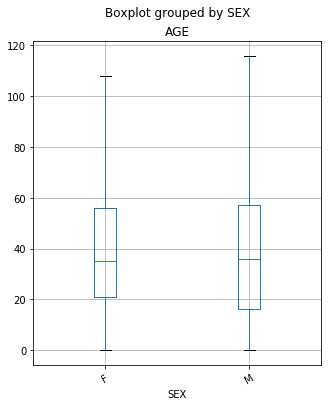

In [4]:
age_boxplot = df.boxplot('AGE','SEX', rot=30, figsize=(5,6), showfliers=False)

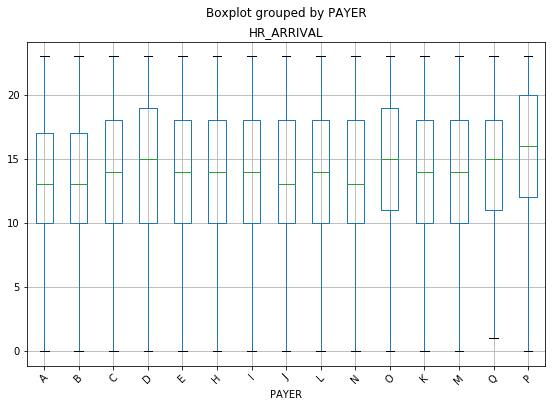

In [5]:
df['HR_ARRIVAL'] = df['HR_ARRIVAL'].astype(int)
time_payer_boxplot = df.boxplot('HR_ARRIVAL','PAYER', rot=45, figsize=(9,6), showfliers=False)

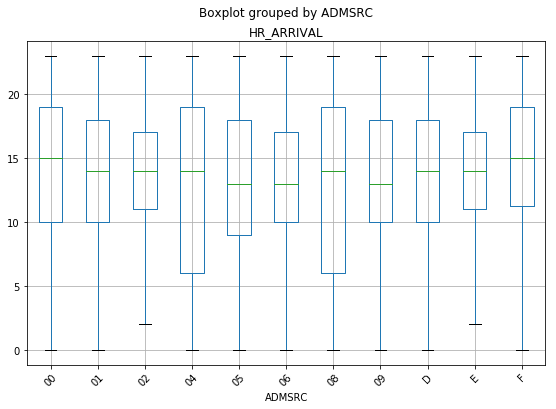

In [6]:
time_admsrc_boxplot = df.boxplot('HR_ARRIVAL','ADMSRC', rot=45, figsize=(9,6), showfliers=False)

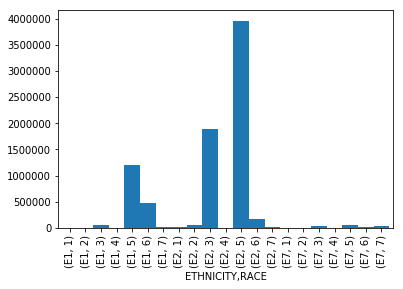

In [7]:
eth_race = df.groupby(['ETHNICITY', 'RACE']).size()
eth_race.plot(kind='bar', width=1)

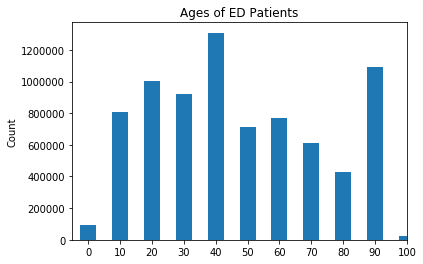

In [8]:
x_age = df['AGES'].unique()
age_count =  df['AGES'].value_counts()

plt.bar(x_age, age_count, align='center', width=5, alpha=1)
plt.xticks(x_age)
plt.ylabel('Count')
plt.title('Ages of ED Patients')
plt.xlim(right=100, left=-5)
plt.show()

In [ ]:
sns.pairplot(df_cat)

In [ ]:
sns.heatmap(df_cat)
plt.figure(figsize=(10,5))
sns.heatmap(df.corr())

In [ ]:
florida_map = gpd.read_file('/Users/EricJC/Documents/Data/tl_2016_12_cousub.shp')
fig.ax = plt.subplots(figsize = (15,15))
florida_map.plot(ax=ax)

In [10]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [13]:
def split_target(data, target_name):
       target = data[[target_name]]
       data.drop(target_name, axis=1, inplace=True)
       return (data, target)
X, y = split_target(df_cat, 'REASON_CDE_01')

In [14]:
#after splitting my data into train and test with the code above, X contains the df and y contains the target (or response variable)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
#Just to check...
print(y_train.groupby('REASON_CDE_01').size())

REASON_CDE_01
0    5989152
1      10848
dtype: int64


In [17]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [18]:
X_train.loc[:] = X_train.loc[:].apply(pd.to_numeric)
X_test.loc[:] = X_test.loc[:].apply(pd.to_numeric)

In [19]:
X_train_cols = X_train.columns
X_test_cols = X_test.columns

In [20]:
X_train = X_train.values
X_test = X_test.values

Linear Regression model for the data

In [22]:
from sklearn.linear_model import LogisticRegression

clfs = [LogisticRegression()]
for clf in clfs:
    clf.fit(X_train, y_train.values.ravel())
    print(type(clf))
    print('Training accuracy: ' + str(clf.score(X_train, y_train)))
    print('Validation accuracy: ' + str(clf.score(X_test, y_test)))
    coefs = {
        'column': [X_train_cols[i] for i in range(len(X_train_cols))],
        'coef': [clf.coef_[0,i] for i in range(len(X_train_cols))]
       }
    df_coefs = pd.DataFrame(coefs)
    print(df_coefs.sort_values('coef', axis=0, ascending=False))


/Users/EricJC/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<class 'sklearn.linear_model.logistic.LogisticRegression'>
Training accuracy: 0.998192
Validation accuracy: 0.99819
             column      coef
13          AGES_30  1.395667
26        AGES_1000  1.358803
14          AGES_40  1.065158
1         ETHNICITY  0.776601
3               SEX  0.720423
21         AGES_110  0.616572
25         AGES_890  0.557225
2              RACE  0.526358
23         AGES_140  0.508831
12          AGES_20  0.484582
15          AGES_50  0.424646
7             PAYER  0.134826
6         PT_STATUS  0.116782
4           WEEKDAY  0.041699
16          AGES_60  0.035861
5        EDHR_DISCH -0.003810
0        FAC_REGION -0.034794
22         AGES_120 -0.102344
17          AGES_70 -0.503429
20         AGES_100 -1.477283
18          AGES_80 -1.665732
19          AGES_90 -1.800897
10           AGES_0 -2.130661
24         AGES_780 -2.652653
11          AGES_10 -3.062398
9   HR_ARRIVAL_01_1 -3.343189
8   HR_ARRIVAL_01_0 -3.604864


Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clfs_rf = [RandomForestClassifier(n_estimators=100)]
for clf in clfs_rf:
    clf.fit(X_train, y_train.values.ravel())
    print(type(clf))
    print('Training accuracy: ' + str(clf.score(X_train, y_train)))
    print('Validation accuracy: ' + str(clf.score(X_test, y_test)))
    imps = {
        'column': [X_train_cols[i] for i in range(len(X_train_cols))],
        'imp': [clf.feature_importances_[i] for i in range(len(X_train_cols))]}
    df_imps = pd.DataFrame(imps)
    print(df_imps.sort_values('imp', axis=0, ascending=False))

Neural Network model

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Scale data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Tx = scaler.transform(X_train)
X_test_Tx = scaler.transform(X_test)

# Fit models that require scaling (e.g. neural networks)
hl_sizes = [150,100,80,60,40,20]
nn_clfs = [MLPClassifier(hidden_layer_sizes=(size,), random_state=42, verbose=True) for size in hl_sizes]
for num, nn_clf in enumerate(nn_clfs):
    print(str(hl_sizes[num]) + '-unit network:')
    nn_clf.fit(X_train_Tx, y_train.ravel())
    print('Training accuracy: ' + str(nn_clf.score(X_train_Tx, y_train)))
    print('Validation accuracy: ' + str(nn_clf.score(X_test_Tx, y_test)))


In [ ]:
Importing the files originally as a whole, then changed the df multiple times by dropping columns.

this proved to be quite slow, and used a lot of memory.

So, i changed the way that the data was imported, just pulling the information that i was interested in

I then created a few functions to help with cleaning my data.
1. select the dx that i was interested in
2. the second function looked at the time of a pt's arrival in the ED. I basically separated the times by "late" and "not late"
since the data is representative of 24 hours in the day
3. i decided to group the ages by decades

the plots that will be shown will basically show a few things:
    1. which zip codes have the highest number of pts for the dx codes of interest
    2. what type of patients are frequenting the ED for the dx codes
    3. what time of days and days of the week these visits are occuring
    4. which physicians are showing higher utilization
    these will be a mixture of heat maps and line graphs and bar charts
    
with the data structured in this fashion will provide a good foundation for machine learning models to be used for predictions
